<a href="https://colab.research.google.com/github/pbhuch/GL_DecA_G4_NLP1/blob/main/GL_DecA_G4_NLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Great Learning : AIML Online Capstone -AUTOMATIC TICKET ASSIGNMENT

DecA : Group 4: NLP 1

Group Members :
1. Priya Moily
2. Priyanka Gupta
3. Avinash Balani
4. Priyank Bhuch


Importing relavant Libraries

In [1]:
!pip install nlpaug

     |████████████████████████████████| 409 kB 5.4 MB/s 
     |████████████████████████████████| 11.3 MB 38.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


In [1]:
!pip install ftfy
from time import time
from PIL import Image
from zipfile import ZipFile
import os, sys, itertools, re
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report
import sklearn.neighbors._base

import imblearn
from imblearn.over_sampling import SMOTE

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Activation, Conv2D, MaxPooling2D, Reshape, Embedding, LSTM,  TimeDistributed, Bidirectional, Lambda, Input, Add, GlobalMaxPool1D
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
#import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# to define loss
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb

from itertools import islice

import re
import nltk
from nltk.corpus import stopwords

from ftfy import fix_encoding, fix_text, badness
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.utils import resample

import pickle, string

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

import spacy

import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

SEED = 123                 # to be able to rerun the same NN
np.random.seed(SEED)
tf.random.set_seed(SEED)

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

     |████████████████████████████████| 64 kB 1.9 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=c4a91a74e63e9be8d4336fd82015077ba8aff0beae017cf1e596db1f19a08278
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ftfy


In [ ]:
! pip install langdetect
from langdetect import detect

In [ ]:
from langdetect import detect
#import googletrans
#from googletrans import Translator

In [ ]:
!pip install goslate
from goslate import Goslate

  Created wheel for goslate: filename=goslate-1.5.2-py3-none-any.whl size=11436 sha256=3cdb538677de9697fe6823cda4c72dd90830ecb783b7fd583314ef7b97abde01
  Stored in directory: /root/.cache/pip/wheels/a8/8a/c4/85425eac5e0746fd5fc898801858331e55ac386f476d65e58d
Successfully built goslate


In [2]:
!pip install spacy

In [3]:
from collections import defaultdict

In [4]:
from bs4 import BeautifulSoup

In [11]:
import gensim
import gensim.corpora as corpora
#Remove stemming(snowball stemming) add lemmatistaion using simple_process from gensim 
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools

#!pip install pyLDAvis

#import pyLDAvis
#import pyLDAvis.gensim_models

In [ ]:
# Load the dataset into a Pandas dataframe called "dataset" and check the head of the dataset
dataset = pd.read_excel('sample_data/input_data.xlsx', )
dataset.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
dataset.shape

(8500, 4)

In [ ]:
dataset.describe()

,Short description,Description,Caller,Assignment group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


In [ ]:
# Find out the null value counts in each column
dataset.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [ ]:
dataset[pd.isnull(dataset).any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [ ]:
# NULL replacement
dataset.fillna(str(), inplace=True)
dataset.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [ ]:
dataset[pd.isnull(dataset).any(axis=1)]

,Short description,Description,Caller,Assignment group


In [ ]:
duplicate = dataset[dataset.duplicated()]

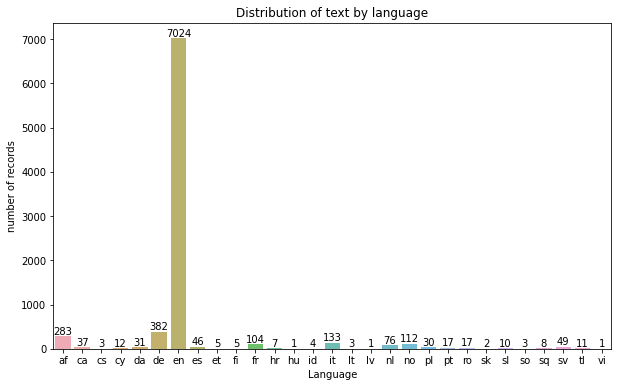

In [ ]:
x = dataset1["Language"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

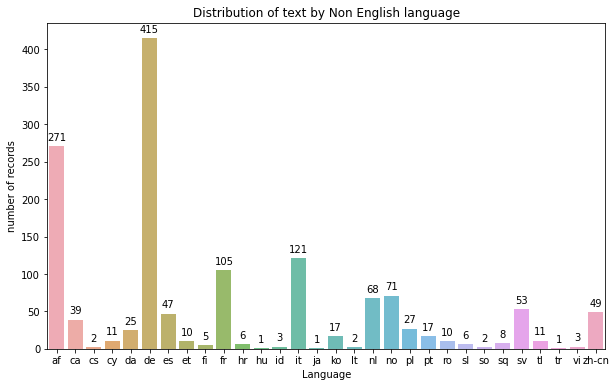

In [93]:
dataset1_nonEnglish = pd.DataFrame(dataset1[dataset1["Language"]!='en'])

x = dataset1_nonEnglish["Language"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by Non English language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [ ]:
duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 51 to 8405
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  83 non-null     object
 1   Description        83 non-null     object
 2   Caller             83 non-null     object
 3   Assignment group   83 non-null     object
dtypes: object(4)
memory usage: 3.2+ KB


In [ ]:
dataset1 = dataset[~dataset.duplicated()]

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8417 non-null   object
 1   Description        8417 non-null   object
 2   Caller             8417 non-null   object
 3   Assignment group   8417 non-null   object
dtypes: object(4)
memory usage: 328.8+ KB


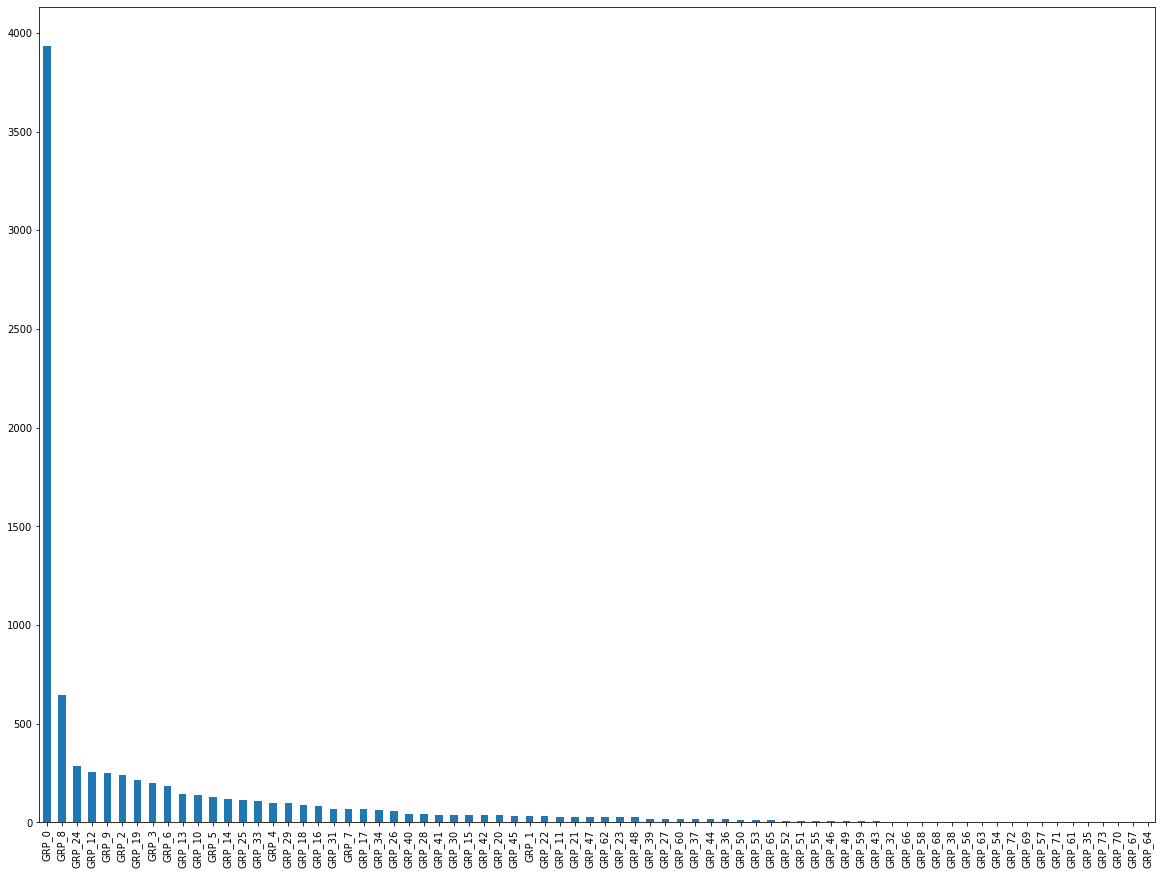

In [ ]:
plt.figure(figsize=(20,15))
dataset1['Assignment group'].value_counts().plot(kind='bar')

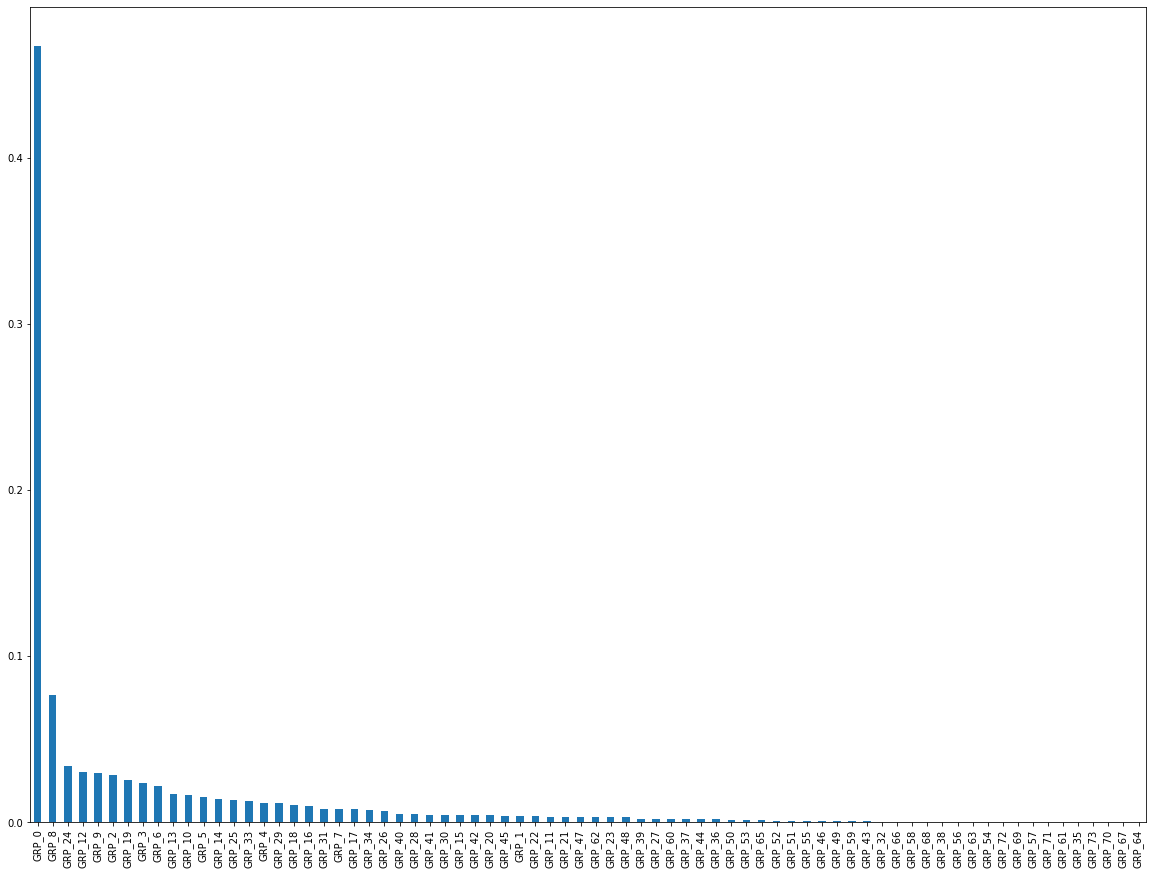

In [ ]:
plt.figure(figsize=(20,15))
dataset1['Assignment group'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
display(dataset1['Assignment group'].value_counts(normalize=True))

GRP_0     0.467387
GRP_8     0.076631
GRP_24    0.033860
GRP_12    0.030533
GRP_9     0.029939
GRP_2     0.028633
GRP_19    0.025544
GRP_3     0.023761
GRP_6     0.021742
GRP_13    0.017227
GRP_10    0.016633
GRP_5     0.015207
GRP_14    0.014019
GRP_25    0.013782
GRP_33    0.012712
GRP_4     0.011881
GRP_29    0.011524
GRP_18    0.010455
GRP_16    0.010099
GRP_31    0.008198
GRP_7     0.008079
GRP_17    0.008079
GRP_34    0.007366
GRP_26    0.006653
GRP_40    0.005346
GRP_28    0.005228
GRP_41    0.004752
GRP_30    0.004633
GRP_15    0.004515
GRP_42    0.004396
GRP_20    0.004277
GRP_45    0.004158
GRP_1     0.003683
GRP_22    0.003683
GRP_11    0.003564
GRP_21    0.003327
GRP_47    0.003208
GRP_62    0.002970
GRP_23    0.002970
GRP_48    0.002970
GRP_39    0.002257
GRP_27    0.002139
GRP_60    0.001901
GRP_37    0.001901
GRP_44    0.001782
GRP_36    0.001782
GRP_50    0.001663
GRP_53    0.001307
GRP_65    0.001307
GRP_52    0.001069
GRP_51    0.000950
GRP_55    0.000950
GRP_46    0.

In [ ]:
# Find out top 10 callers in terms of frequency of raising tickets in the entire dataset
print('\033[1mTotal caller count:\033[0m', dataset1['Caller'].nunique())
df_sample = pd.DataFrame(dataset1.groupby(['Caller']).size().nlargest(10), columns=['Count']).reset_index()
df_sample.iplot(kind='pie',
         labels='Caller', 
         values='Count', 
         title='Top 10 caller- Pie Chart (Fig-7)',
         colorscale='-spectral',
         pull=[0,0,0,0,0.05,0.1,0.15,0.2,0.25,0.3])

Total caller count: 2950


In [ ]:
# Top 5 callers in each assignment group
top_n = 5
df_sample2 = dataset1['Caller'].groupby(dataset1['Assignment group']).value_counts()
caller_grp = pd.DataFrame(df_sample2.groupby(level=0).nlargest(top_n).reset_index(level=0, drop=True))
caller_grp.head(15)

Caller
Assignment group Caller                   
GRP_0            fumkcsji sarmtlhy     126
                 rbozivdq gmlhrtvp      71
                 olckhmvx pcqobjnd      47
                 efbwiadp dicafxhv      45
                 mfeyouli ndobtzpw      13
GRP_1            bpctwhsn kzqsbmtp       6
                 jloygrwh acvztedi       4
                 jyoqwxhz clhxsoqy       3
                 spxqmiry zpwgoqju       3
                 kbnfxpsy gehxzayq       2
GRP_10           bpctwhsn kzqsbmtp      60
                 ihfkwzjd erbxoyqk       6
                 dizquolf hlykecxa       5
                 gnasmtvx cwxtsvkm       3
                 hlrmufzx qcdzierm       3

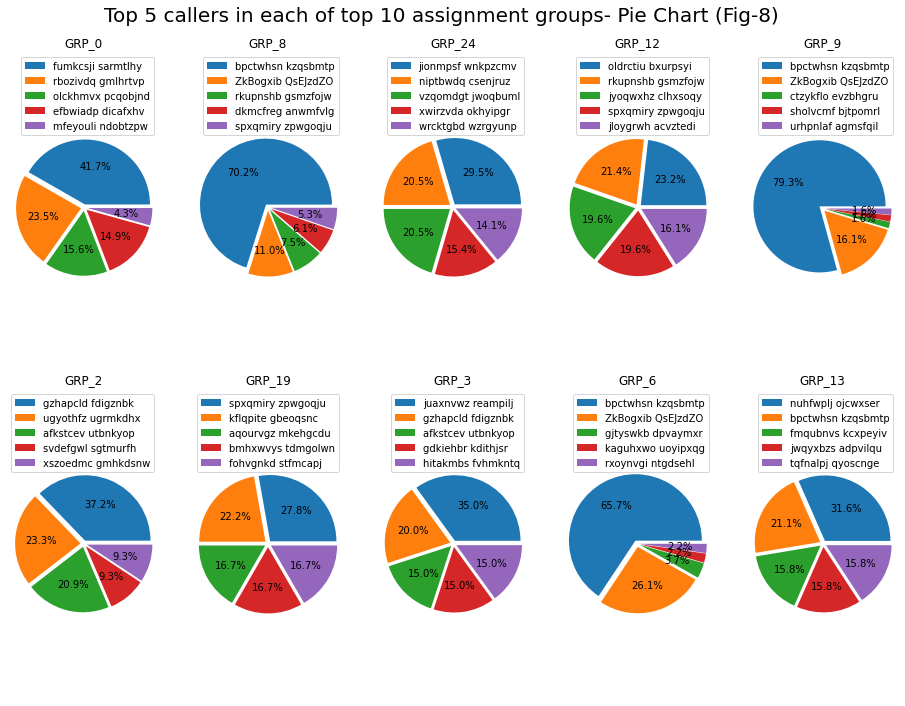

In [ ]:
# Visualize Top 5 callers in each of top 10 assignment groups
top_n = 10
df_sample3 = pd.DataFrame(dataset1.groupby('Assignment group').size(),columns = ['Count']).reset_index()
top_grps = df_sample3.nlargest(top_n, 'Count')['Assignment group'].tolist()

fig_cols = 5
fig_rows = int(np.ceil(top_n/fig_cols))
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(13,9.5))
fig.suptitle('Top 5 callers in each of top 10 assignment groups- Pie Chart (Fig-8)', y=1, va= 'bottom', size='20')
for row in range(fig_rows):
    for col in range(fig_cols):
        grp_n = fig_cols * row + col
        if grp_n < top_n:
            xs = caller_grp.xs(top_grps[grp_n])
            _ = axes[row,col].pie(xs, autopct='%1.1f%%', explode=[0.05]*5)
            axes[row,col].legend(labels=xs.index,loc="best")
            axes[row,col].axis('equal')
            axes[row,col].set_title(top_grps[grp_n])

plt.tight_layout()

In [ ]:
dataset1.insert(loc=4, 
              column='combined_description', 
              allow_duplicates=True, 
              value=list(dataset1['Short description'].str.strip() + ' ' + dataset1['Description'].str.strip()))

In [ ]:
def fn_decode_to_ascii(df):
  text = df.encode().decode('utf-8').encode('ascii', 'ignore')
  return text.decode("utf-8") 

dataset1['combined_description'] = dataset1['combined_description'].apply(fn_decode_to_ascii)

In [ ]:
dataset1.head()

,Short description,Description,Caller,Assignment group,combined_description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook received from: hmjdrvpb.komuaywn@gmail...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from: eylqgodm.ybq...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error


In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     8417 non-null   object
 1   Description           8417 non-null   object
 2   Caller                8417 non-null   object
 3   Assignment group      8417 non-null   object
 4   combined_description  8417 non-null   object
dtypes: object(5)
memory usage: 394.5+ KB


In [ ]:
dataset1.to_csv("dataset_combined.csv")

In [ ]:
# Write a function to apply to the dataset to detect Mojibakes
def is_mojibake_impacted(text):
    if not badness.sequence_weirdness(text):
        # nothing weird, should be okay
        return True
    try:
        text.encode('sloppy-windows-1252')
    except UnicodeEncodeError:
        # Not CP-1252 encodable, probably fine
        return True
    else:
        # Encodable as CP-1252, Mojibake alert level high
        return False
    
# Check the dataset for mojibake impact
dataset1[~dataset1.iloc[:,:].applymap(is_mojibake_impacted).all(1)]

,Short description,Description,Caller,Assignment group,combined_description
99,password expiry tomorrow,\n\nreceived from: ecprjbod.litmjwsy@gmail.com...,ecprjbod litmjwsy,GRP_0,password expiry tomorrow received from: ecprjb...
116,server issues,\r\n\r\nreceived from: bgqpotek.cuxakvml@gmail...,bgqpotek cuxakvml,GRP_0,server issues received from: bgqpotek.cuxakvml...
124,mobile device activation,"from: tvcdfqgp nrbcqwgj \nsent: friday, octobe...",tvcdfqgp nrbcqwgj,GRP_0,mobile device activation from: tvcdfqgp nrbcqw...
162,access to bex,\r\n\r\nreceived from: yfqoaepn.xnezhsit@gmail...,yfqoaepn xnezhsit,GRP_0,access to bex received from: yfqoaepn.xnezhsit...
164,æ’¤å›ž: ticket_no1564867 -- comments added,\n\nreceived from: abcdri@company.com\n\nwindy...,tycludks cjofwigv,GRP_0,: ticket_no1564867 -- comments added received ...
170,[urgent!!] delivery note creation request!!,\n\nreceived from: fbvpcytz.nokypgvx@gmail.com...,fbvpcytz nokypgvx,GRP_18,[urgent!!] delivery note creation request!! re...
177,unable to access password_management_tool id p...,i try to change now my password acc. to attach...,ijeqpkrz nwtehsyx,GRP_2,unable to access password_management_tool id p...
186,é’å²›å…´åˆæœºç”µshipment notificationé‚®ç®±è...,"from: \nsent: friday, october 28, 2016 7:20 a...",yafxlpwi lhxvatkb,GRP_18,"shipment notification from: \nsent: friday, o..."
222,support fÃ¼r fa.gstry \arexjftu ohxdwngl,support fÃ¼r fa.konnica \arexjftu ohxdwngl,arexjftu ohxdwngl,GRP_24,support fr fa.gstry \arexjftu ohxdwngl support...
223,probleme mit bluescreen .,"hallo ,\n\nes ist erneut passiert. der pc hat ...",vrfpyjwi nzhvgqiw,GRP_24,"probleme mit bluescreen . hallo ,\n\nes ist er..."


In [ ]:
# Take an example of row# 8471 combined_description and fix it
print('Garbled text: \033[1m%s\033[0m\nFixed text: \033[1m%s\033[0m' % (dataset1['combined_description'][8471], 
                                                                        fix_text(dataset1['combined_description'][8471])))

# List all mojibakes defined in ftfy library
#print('\nMojibake Symbol RegEx:\n', badness.MOJIBAKE_SYMBOL_RE.pattern)

Garbled text:  to 
Fixed text:  to 


In [ ]:
dataset1['Short description']=dataset1['Short description'].apply(fix_text)
dataset1['Description']=dataset1['Description'].apply(fix_text)
dataset1['combined_description']=dataset1['combined_description'].apply(fix_text)

In [ ]:
# Visualize row#8471
dataset1.loc[8471,:]

Short description                电脑开机开不出来
Description              to 小贺,早上电脑开机开不出来
Caller                  xqyjztnm onfusvlz
Assignment group                   GRP_30
combined_description                  to 
Name: 8471, dtype: object

In [ ]:
def fn_lan_detect(df):                                        
   try:                                                          
      return detect(df)                                      
   except:                                                       
      return 'no'

In [ ]:
dataset1['Language'] = dataset1['combined_description'].apply(fn_lan_detect)

In [ ]:
dataset1.head()

,Short description,Description,Caller,Assignment group,combined_description,Language
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,en
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,outlook received from: hmjdrvpb.komuaywn@gmail...,en
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from: eylqgodm.ybq...,en
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,no


In [ ]:
dataset1['Language'].value_counts()

en    7024
de     382
af     283
it     133
no     112
fr     104
nl      76
sv      49
es      46
ca      37
da      31
pl      30
ro      17
pt      17
cy      12
tl      11
sl      10
sq       8
hr       7
fi       5
et       5
id       4
cs       3
so       3
lt       3
sk       2
lv       1
hu       1
vi       1
Name: Language, dtype: int64

In [ ]:
dataset1.reset_index(inplace=True)

In [ ]:
dataset1.to_csv('dataset_mojibake_treated_LanguageDetected.csv', index=False, encoding='utf_8_sig')

In [ ]:
email_regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'

In [ ]:
def fn_remove_irrelaventWords(df,columnName):
  for index in range(df.shape[0]):
    df[columnName][index] = df[columnName][index].lower()                                       # to lower case 
    df[columnName][index] = re.sub(email_regex,"",df.loc[index,columnName])                     # remove email address
    df[columnName][index] = re.sub(r'\S*@\S*\s?', '', df.loc[index,columnName])                 # remove email address with appended text
    df[columnName][index] = re.sub(r"received from:",' ',df.loc[index,columnName])              # remove unwanted text
    df[columnName][index] = re.sub(r"from:",' ',df.loc[index,columnName])                       # remove unwanted text
    df[columnName][index] = re.sub(r"to:",' ',df.loc[index,columnName])                         # remove unwanted text
    df[columnName][index] = re.sub(r"subject:",' ',df.loc[index,columnName])                    # remove unwanted text  
    df[columnName][index] = re.sub(r"sent:",' ',df.loc[index,columnName])                       # remove unwanted text
    df[columnName][index] = re.sub(r"ic:",' ',df.loc[index,columnName])                         # remove unwanted text
    df[columnName][index] = re.sub(r"cc:",' ',df.loc[index,columnName])                         # remove unwanted text
    df[columnName][index] = re.sub(r"bcc:",' ',df.loc[index,columnName])                        # remove unwanted text  
    df[columnName][index] = re.sub(r'\d+','' ,df.loc[index,columnName])                         # remove numbers
    df[columnName][index] = re.sub(r'\n',' ',df.loc[index,columnName])                          # remove new line character
    df[columnName][index] = re.sub(r'#','', df.loc[index,columnName])                           # remove hashtag while keeping hashtag text
    df[columnName][index] = re.sub(r'&;?', 'and',df.loc[index,columnName])                      # remove &
    df[columnName][index] = re.sub(r'\&\w*;', '', df.loc[index,columnName])                     # remove HTML special entities (e.g. &amp;)
    df[columnName][index] = re.sub(r'https?:\/\/.*\/\w*', '', df.loc[index,columnName])         # remove hyperlinks
  return df

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 8417 non-null   int64 
 1   Short description     8417 non-null   object
 2   Description           8417 non-null   object
 3   Caller                8417 non-null   object
 4   Assignment group      8417 non-null   object
 5   combined_description  8417 non-null   object
 6   Language              8417 non-null   object
dtypes: int64(1), object(6)
memory usage: 460.4+ KB


In [ ]:
df_clean = fn_remove_irrelaventWords(dataset1,'combined_description')

In [ ]:
df_clean.head(10)

,index,Short description,Description,Caller,Assignment group,combined_description,Language
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee a...,en
1,1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,"outlook hello team, my meetings/skype mee...",en
2,2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn hi i cannot log on to ...,en
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,en
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,no
5,5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,unable to log in to engineering tool and skype...,en
6,6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,event: critical:hostname_.company.com the valu...,en
7,7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,ticket_no- employment status - new non-employe...,en
8,8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,unable to disable add ins on outlook unable to...,en
9,9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,ticket update on inplant_ ticket update on inp...,en


In [ ]:
dataset1.head(10)

,index,Short description,Description,Caller,Assignment group,combined_description,Language
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee a...,en
1,1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,"outlook hello team, my meetings/skype mee...",en
2,2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn hi i cannot log on to ...,en
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,en
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,no
5,5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,unable to log in to engineering tool and skype...,en
6,6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,event: critical:hostname_.company.com the valu...,en
7,7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,ticket_no- employment status - new non-employe...,en
8,8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,unable to disable add ins on outlook unable to...,en
9,9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,ticket update on inplant_ ticket update on inp...,en


In [ ]:
df_clean.to_csv("dataset_clean_combined_description")

In [ ]:
df_clean.insert(loc=7,column='ConvertedToEnglish',value = np.nan, allow_duplicates = True)

In [ ]:
df_clean.head()

,index,Short description,Description,Caller,Assignment group,combined_description,Language,ConvertedToEnglish
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee a...,en,NaN
1,1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,"outlook hello team, my meetings/skype mee...",en,NaN
2,2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn hi i cannot log on to ...,en,NaN
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,en,NaN
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,no,NaN


In [ ]:
svc_domains = ['.com','.com.au','.com.ar','.co.kr','.co.in','.co.jp','.at','.de','.ru','.ch','.fr','.es','.ae']
svc_urls = ['http://translate.google' + domain for domain in svc_domains]

In [ ]:
gs = Goslate(service_urls=svc_urls)

In [ ]:
trans_8416 = gs.translate(df_clean['combined_description'][8416], target_language='en', source_language='auto')

In [ ]:
print ('Original Text : ',df_clean['combined_description'][8416])
print('Traslated to English : ',trans_8416)

Original Text :  an mehreren pc`s lassen sich verschiedene prgramdntyme nicht ffnen. an mehreren pc`s lassen sich verschiedene prgramdntyme nicht ffnen. bereich cnc.
Traslated to English :  Several prgramdntyme can not be folded on several PCs. Several prgramdntyme can not be folded on several PCs. Area CNC.


In [ ]:
def fn_ConvertToEnglish(df,columnName):
  for idx in range(df.shape[0]):
    row_iter = gs.translate(df[columnName][idx],target_language='en',source_language = 'auto')
    df[columnName][idx] = str(row_iter)
  return df

In [ ]:
#df_translated = fn_ConvertToEnglish(df_clean,'ConvertedToEnglish')
#df_translated.head()
#df_translated.to_csv('/sample_data/dataset_mojibaked_LangDetect_Translated.csv')')

#Importing the translated csv rather than running the code
df_translated = pd.read_csv('/content/sample_data/dataset_mojibaked_LangDetect_Translated.csv',encoding='ISO-8859-1')

In [ ]:
df_translated.tail()

,Unnamed: 0,Unnamed: 0.1,Short description,Description,Caller,Assignment group,combined_description_caller,combined_description,Language,ConvertedToEnglish
8412,8412,8412,emails not coming in from zz mail,received from avglmrts.vhqmtiua@gmail.com\n go...,avglmrts vhqmtiua,GRP_29,emails not coming in from zz mail received fro...,emails not coming in from zz mail received fro...,en,emails not coming in from zz mail received fro...
8413,8413,8413,telephonysoftware issue,telephonysoftware issue,rbozivdq gmlhrtvp,GRP_0,telephonysoftware issue telephonysoftware issu...,telephonysoftware issue telephonysoftware issue,en,telephonysoftware issue telephonysoftware issue
8414,8414,8414,vip windows password reset for tifpdchb pedxruyf,vip windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,GRP_0,vip windows password reset for tifpdchb pedxru...,vip windows password reset for tifpdchb pedxru...,en,vip windows password reset for tifpdchb pedxru...
8415,8415,8415,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine nÃ£o estÃ¡ funcionando i am unable to ...,en,machine nÃ£o estÃ¡ funcionando i am unable to ...
8416,8416,8416,an mehreren pcs lassen sich verschiedene prgra...,an mehreren pcs lassen sich verschiedene prgra...,kqvbrspl jyzoklfx,GRP_49,an mehreren pcs lassen sich verschiedene prgra...,an mehreren pcs lassen sich verschiedene prgra...,de,Several PCs can not open various prgramdntyms ...


In [ ]:
df_translated = df_translated.drop(columns=['Unnamed: 0','Unnamed: 0.1','Short description','Description','combined_description_caller'],axis=1)

In [ ]:
df_translated.head()

,Caller,Assignment group,combined_description,Language,ConvertedToEnglish
0,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,en,login issue verified user detailsemployee mana...
1,hmjdrvpb komuaywn,GRP_0,outlook received from hello team my meetings...,en,outlook received from hello team my meetingssk...
2,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from hi i cannot...,en,cant log in to vpn received from hi i cannot l...
3,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,en,unable to access hrtool page unable to access ...
4,owlgqjme qhcozdfx,GRP_0,skype error skype error,no,Skype Error Skype Error


In [ ]:
df_ML = df_translated.copy()
df_DL = df_translated.copy()

In [ ]:
print(df_ML.shape)
print(df_DL.shape)

(8417, 5)
(8417, 5)


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords = set(stopwords.words('english'))
 # Remove stopwords
df_ML['ConvertedToEnglish'] = df_ML['ConvertedToEnglish'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

In [ ]:
#lemmatization
# Initialize spacy 'en' medium model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en', disable=['parser', 'ner'])

# Define a function to lemmatize the descriptions
def lemmatizer(sentence):
    # Parse the sentence using the loaded 'en' model object `nlp`
    doc = nlp(sentence)
    return " ".join([token.lemma_ for token in doc if token.lemma_ !='-PRON-'])

In [ ]:
print('\033[1mOriginal text:\033[0m')
print(df_ML['ConvertedToEnglish'][50])
print('_'*100)
print('\033[1mLemmatized text:\033[0m')
print(lemmatizer(df_ML['ConvertedToEnglish'][50]))

Original text:
job mmzscrdlymerktc failed jobscheduler received job mmzscrdlymerktc failed jobscheduler
____________________________________________________________________________________________________
Lemmatized text:
job mmzscrdlymerktc fail jobscheduler receive job mmzscrdlymerktc fail jobscheduler


In [ ]:
df_ML['ConvertedToEnglish'] = df_ML['ConvertedToEnglish'].apply(lemmatizer)

In [ ]:
df_ML.head()

,Caller,Assignment group,combined_description,Language,ConvertedToEnglish
0,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,en,login issue verify user detailsemployee manage...
1,hmjdrvpb komuaywn,GRP_0,outlook received from hello team my meetings...,en,outlook receive hello team meetingsskype meeti...
2,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from hi i cannot...,en,can not log vpn receive hi can not log vpn best
3,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,en,unable access hrtool page unable access hrtool...
4,owlgqjme qhcozdfx,GRP_0,skype error skype error,no,Skype Error Skype Error


In [10]:
#df_ML.to_csv("dataset_Cleaned_Translated_StopWords_Lemmatized.csv")
df_ML = pd.read_csv('/content/sample_data/dataset_Cleaned_Translated_StopWords_Lemmatized.csv')

Wordcloud for entire Dataset

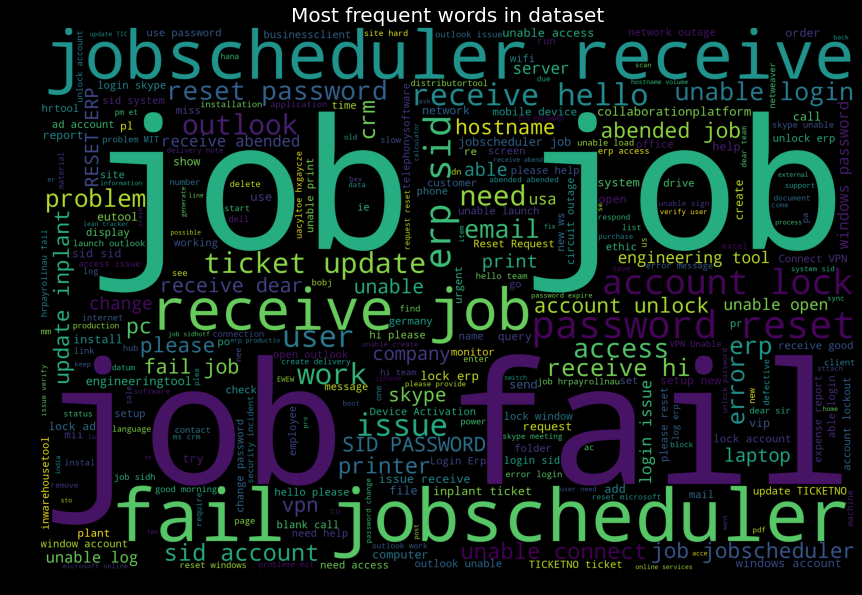

In [12]:
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,max_words=300,
    background_color = 'black')

# generate word cloud for data
wc_word=wc.generate(str(df_ML.ConvertedToEnglish))
print(wc_word)

# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')

# add title to the graph
plt.title("Most frequent words in dataset", fontsize=20,color='white')
plt.imshow(wc_word)
plt.show()

In [36]:
#ngram function
def ngram_extractor(text, n_gram):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Function to generate a dataframe with n_gram and top max_row frequencies
def generate_ngrams(df, n_gram, max_row):
    temp_dict = defaultdict(int)
    for question in df:
        for word in ngram_extractor(question, n_gram):
            temp_dict[word] += 1
    temp_df = pd.DataFrame(sorted(temp_dict.items(), key=lambda x: x[1])[::-1]).head(max_row)
    temp_df.columns = ["word", "wordcount"]
    return temp_df

In [32]:
df_ML.isna().sum()
df_ML.fillna(str(), inplace=True)
df_ML.isnull().sum()
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            8417 non-null   int64 
 1   Caller                8417 non-null   object
 2   Assignment group      8417 non-null   object
 3   combined_description  8417 non-null   object
 4   Language              8417 non-null   object
 5   ConvertedToEnglish    8417 non-null   object
dtypes: int64(1), object(5)
memory usage: 394.7+ KB


In [33]:
Ticket_desc = df_ML['ConvertedToEnglish']
#Define empty list
ticket_desc_cleaned = []
res = []
#Define for loop to iterate through the elements of the ticket_desc
for l in Ticket_desc:
    #Parse the contents of the cell
    soup = BeautifulSoup(l, 'html.parser')
    #Find all instances of the text within the </p> tag
    for el in soup.find_all('p'):
        res.append(el.get_text())
    #concatenate the strings from the list    
    endstring = ' '.join(map(str, res))
    #reset list
    res = []
    #Append the concatenated string to the main list
    ticket_desc_cleaned.append(endstring)

In [34]:
ticket_desc_na_cleaned = [item.lower() for item in Ticket_desc]
#remove html links from list 
ticket_desc_na_cleaned =  [re.sub(r"http\S+", "", item) for item in ticket_desc_na_cleaned]
#remove special characters left
ticket_desc_na_cleaned = [re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", item) for item in ticket_desc_na_cleaned]

#convert to dataframe and rename the column of the ticket_desc_na_cleaned list
ticket_desc_clean = pd.DataFrame(np.array(ticket_desc_na_cleaned).reshape(-1))
ticket_desc_clean.columns = ["ans"]
#Squeeze dataframe to obtain series
desc_cleaned = ticket_desc_clean.squeeze()

In [37]:
#generate unigram
ans_unigram = generate_ngrams(desc_cleaned, 1, 30)

In [38]:
ans_unigram.head()

,word,wordcount
0,job,3000
1,receive,2541
2,please,2298
3,password,2171
4,erp,1974


In [39]:
ans_unigram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   word       30 non-null     object
 1   wordcount  30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


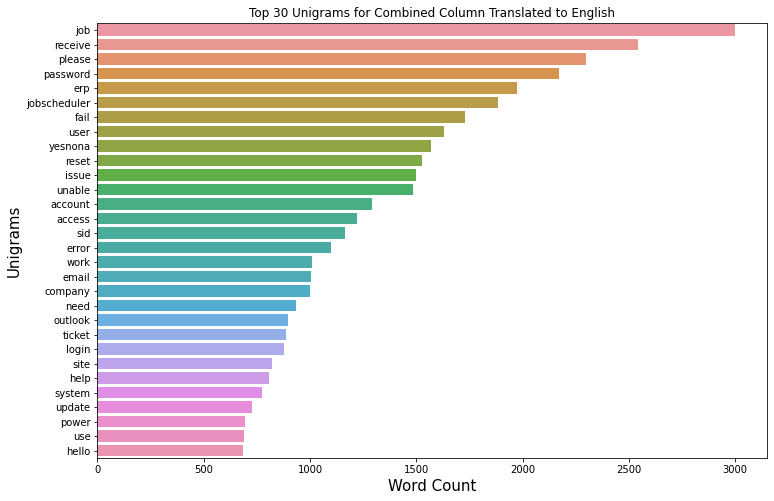

In [ ]:
#generate barplot for unigram
plt.figure(figsize=(12,8))
sns.barplot(ans_unigram["wordcount"],ans_unigram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Unigrams", fontsize=15)
plt.title("Top 30 Unigrams for Combined Column Translated to English")
plt.show()

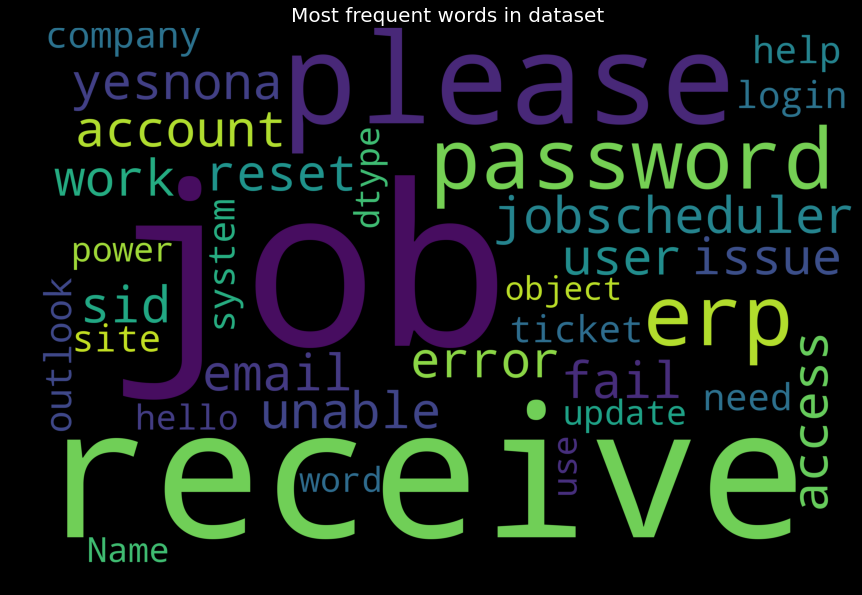

In [86]:
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,max_words=300,
    background_color = 'black')

# generate word cloud for data
#wc_word=wc.generate(str(ans_unigram))
wc_word=wc.generate(str(ans_unigram['word']))
print(wc_word)

# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')

# add title to the graph
plt.title("Most frequent words in dataset", fontsize=20,color='white')
plt.imshow(wc_word)
plt.show()

In [40]:
#generate bigram
ans_bigram = generate_ngrams(desc_cleaned, 2, 20)

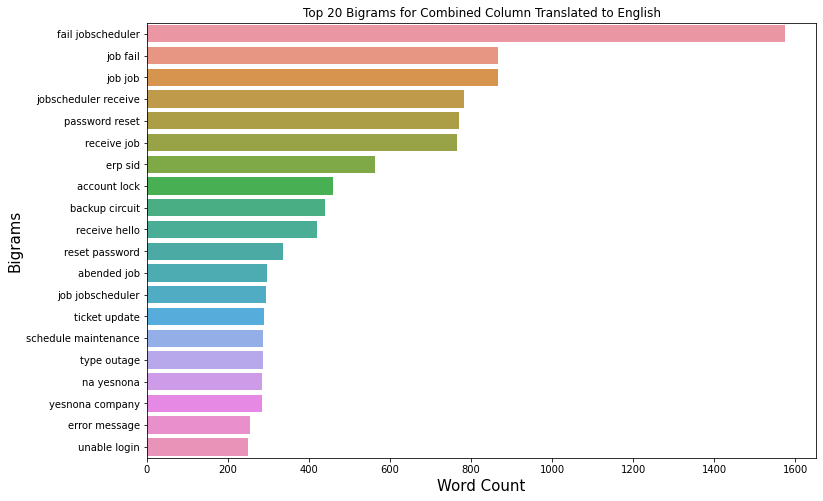

In [ ]:
#generate barplot for bigram
plt.figure(figsize=(12,8))
sns.barplot(ans_bigram["wordcount"],ans_bigram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Bigrams", fontsize=15)
plt.title("Top 20 Bigrams for Combined Column Translated to English")
plt.show()

Wordcloud for bigram

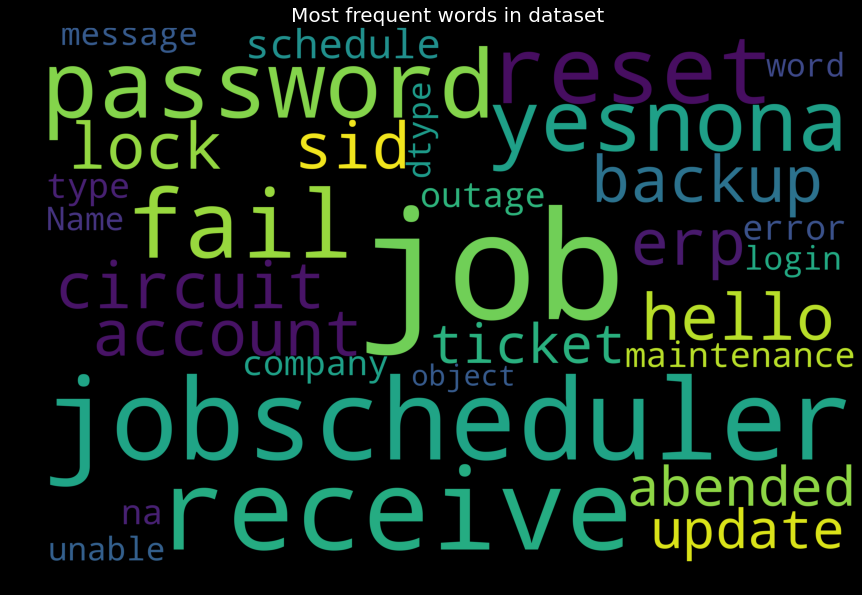

In [87]:
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,max_words=300,
    background_color = 'black')

# generate word cloud for data
wc_word=wc.generate(str(ans_bigram['word']))
print(wc_word)

# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')

# add title to the graph
plt.title("Most frequent words in dataset", fontsize=20,color='white')
plt.imshow(wc_word)
plt.show()

Generate Trigram

In [41]:
#generate trigram
ans_trigram = generate_ngrams(desc_cleaned, 3, 20)

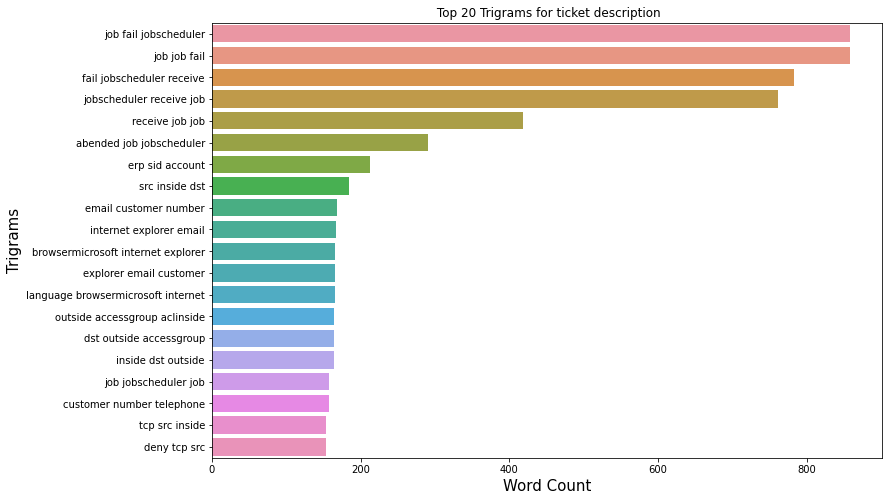

In [ ]:
#generate barplot for bigram
plt.figure(figsize=(12,8))
sns.barplot(ans_trigram["wordcount"],ans_trigram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Trigrams", fontsize=15)
plt.title(" Top 20 Trigrams for ticket description")
plt.show()

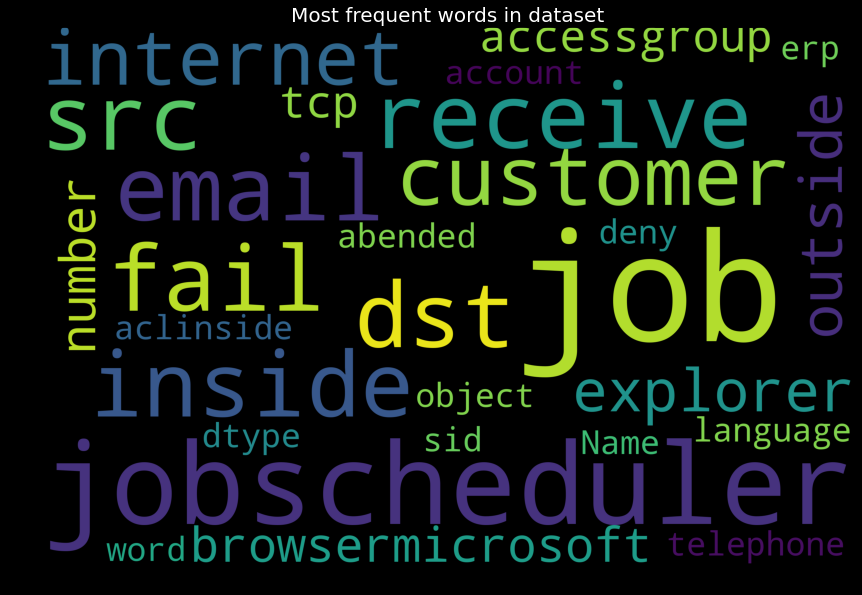

In [88]:
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,max_words=300,
    background_color = 'black')

# generate word cloud for data
wc_word=wc.generate(str(ans_trigram['word']))
print(wc_word)

# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')

# add title to the graph
plt.title("Most frequent words in dataset", fontsize=20,color='white')
plt.imshow(wc_word)
plt.show()

In [43]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            8417 non-null   int64 
 1   Caller                8417 non-null   object
 2   Assignment group      8417 non-null   object
 3   combined_description  8417 non-null   object
 4   Language              8417 non-null   object
 5   ConvertedToEnglish    8417 non-null   object
dtypes: int64(1), object(5)
memory usage: 394.7+ KB


In [ ]:
!pip install -U pandas-profiling

     |████████████████████████████████| 261 kB 8.4 MB/s 
     |████████████████████████████████| 10.1 MB 39.5 MB/s 
     |████████████████████████████████| 102 kB 15.5 MB/s 
     |████████████████████████████████| 675 kB 87.3 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 303 kB 75.2 MB/s 
     |████████████████████████████████| 596 kB 74.2 MB/s 
     |████████████████████████████████| 3.1 MB 45.1 MB/s 
     |████████████████████████████████| 812 kB 64.9 MB/s 
     |████████████████████████████████| 38.2 MB 25 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=59e546bb24c2e52197f75b5f0d032f9eeb0b6fb8e4bbf23197129398a841799f
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=5b7610d21b82c2b80991d1221abe30e2791476df129b8420344bd72738a054de
  

In [44]:
df_ML.head()

,Unnamed: 0,Caller,Assignment group,combined_description,Language,ConvertedToEnglish
0,0,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,en,login issue verify user detailsemployee manage...
1,1,hmjdrvpb komuaywn,GRP_0,outlook received from hello team my meetings...,en,outlook receive hello team meetingsskype meeti...
2,2,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from hi i cannot...,en,can not log vpn receive hi can not log vpn best
3,3,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,en,unable access hrtool page unable access hrtool...
4,4,owlgqjme qhcozdfx,GRP_0,skype error skype error,no,Skype Error Skype Error


In [ ]:
!pip uninstall numpy
!pip uninstall pandas

!pip install --user numpy
!pip install --user  pandas

Found existing installation: numpy 1.21.4
Uninstalling numpy-1.21.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.7
    /usr/local/lib/python3.7/dist-packages/numpy-1.21.4.dist-info/*
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libopenblasp-r0-2d23e62b.3.17.so
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.21.4
Found existing installation: pandas 1.3.4
Uninstalling pandas-1.3.4:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas-1.3.4.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas/*
Proceed (y/n)? y
  Successfully uninstalled pandas-1.3.4
  Using cached numpy-1.21.4-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Consider adding this directory to PATH or, if yo

  Using cached pandas-1.3.4-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.


In [45]:
#Convert  Combined text from each sentense to the words. use of simple_process as it tokenize() internally
#https://radimrehurek.com/gensim/utils.html#gensim.utils.simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [46]:
data_words = list(sent_to_words(df_ML.ConvertedToEnglish))

In [50]:
print(len(data_words))

8417


In [51]:
# Build the bigram and trigram models
#https://radimrehurek.com/gensim/models/phrases.html
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [52]:
print(bigram_mod[data_words[1]])

['outlook', 'receive', 'hello', 'team', 'meetingsskype', 'meeting', 'etc', 'appear', 'outlook', 'calendar', 'somebody', 'please', 'advise', 'correct', 'kind']


In [53]:
print(trigram_mod[data_words[1]])

['outlook', 'receive', 'hello', 'team', 'meetingsskype', 'meeting', 'etc', 'appear', 'outlook', 'calendar', 'somebody', 'please', 'advise', 'correct', 'kind']


In [54]:
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [55]:
# Form Bigrams
data_words_trigrams = make_trigrams(data_words)

In [73]:
wordclouds=' '.join(map(str, data_words_trigrams))

In [74]:
wordCloudfinal = wordclouds.replace('\', \'',' ').replace(']',' ').replace('[',' ').replace('\'','').replace('   ',' ')

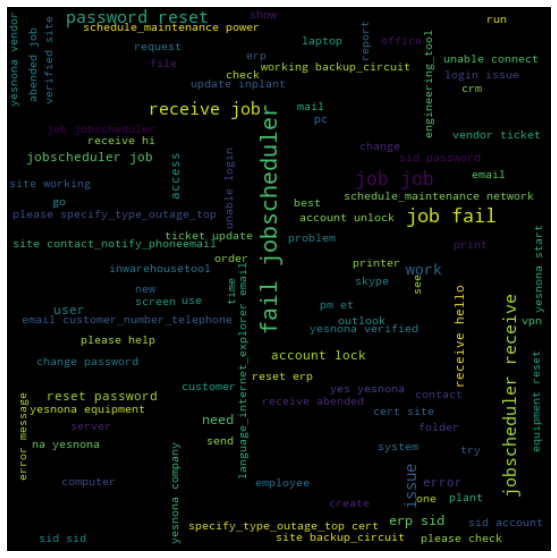

In [75]:
wordcloud = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10).generate(wordCloufinal)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [76]:
new_df = df_ML.copy()
new_df['words'] = data_words_trigrams
new_df.head()

,Unnamed: 0,Caller,Assignment group,combined_description,Language,ConvertedToEnglish,words
0,0,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,en,login issue verify user detailsemployee manage...,"[login, issue, verify, user, detailsemployee_m..."
1,1,hmjdrvpb komuaywn,GRP_0,outlook received from hello team my meetings...,en,outlook receive hello team meetingsskype meeti...,"[outlook, receive, hello, team, meetingsskype,..."
2,2,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from hi i cannot...,en,can not log vpn receive hi can not log vpn best,"[can, not, log, vpn, receive, hi, can, not, lo..."
3,3,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,en,unable access hrtool page unable access hrtool...,"[unable, access, hrtool, page, unable, access,..."
4,4,owlgqjme qhcozdfx,GRP_0,skype error skype error,no,Skype Error Skype Error,"[skype, error, skype, error]"


In [77]:
sortedListOfGroup = df_ML['Assignment group'].value_counts().sort_values(ascending=False).index
sortedListOfGroup

Index(['GRP_0', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9', 'GRP_2', 'GRP_19',
       'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14', 'GRP_25',
       'GRP_33', 'GRP_4', 'GRP_29', 'GRP_18', 'GRP_16', 'GRP_31', 'GRP_17',
       'GRP_7', 'GRP_34', 'GRP_26', 'GRP_40', 'GRP_28', 'GRP_41', 'GRP_30',
       'GRP_15', 'GRP_42', 'GRP_20', 'GRP_45', 'GRP_22', 'GRP_1', 'GRP_11',
       'GRP_21', 'GRP_47', 'GRP_23', 'GRP_62', 'GRP_48', 'GRP_39', 'GRP_27',
       'GRP_60', 'GRP_37', 'GRP_36', 'GRP_44', 'GRP_50', 'GRP_65', 'GRP_53',
       'GRP_52', 'GRP_51', 'GRP_55', 'GRP_49', 'GRP_46', 'GRP_59', 'GRP_43',
       'GRP_32', 'GRP_66', 'GRP_68', 'GRP_63', 'GRP_38', 'GRP_58', 'GRP_56',
       'GRP_57', 'GRP_54', 'GRP_69', 'GRP_71', 'GRP_72', 'GRP_61', 'GRP_64',
       'GRP_67', 'GRP_35', 'GRP_70', 'GRP_73'],
      dtype='object')

In [81]:
def wordcloud_grp(f, x):
    wordclouds_0=' '.join(map(str, f))

    wc = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10, max_words=50).generate(wordclouds_0.replace('\'',''))
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most common 50 words of {}".format(x))
    plt.margins(x=0, y=0)
    plt.show()

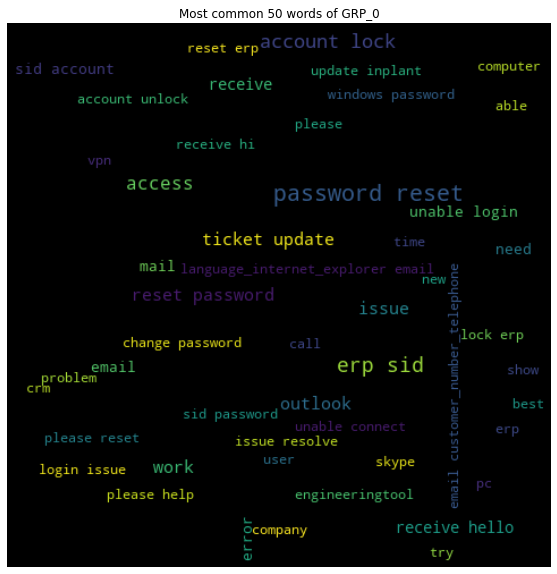

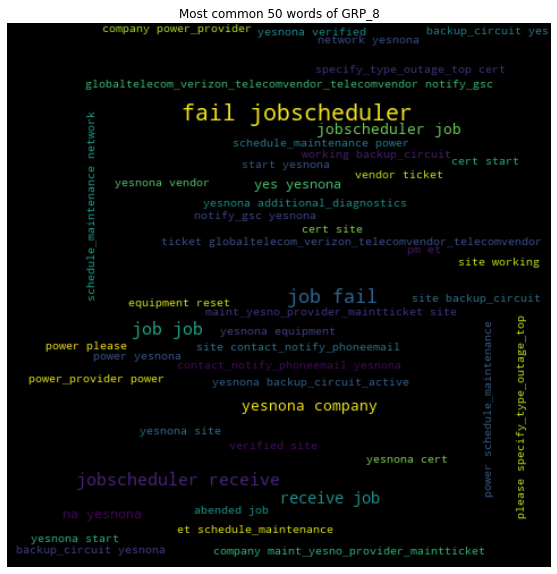

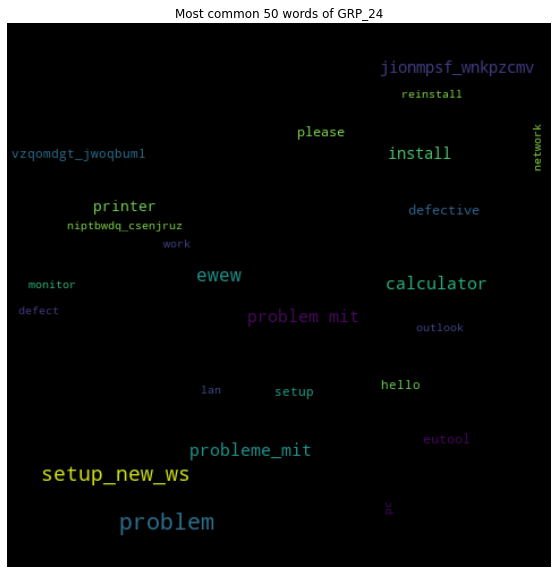

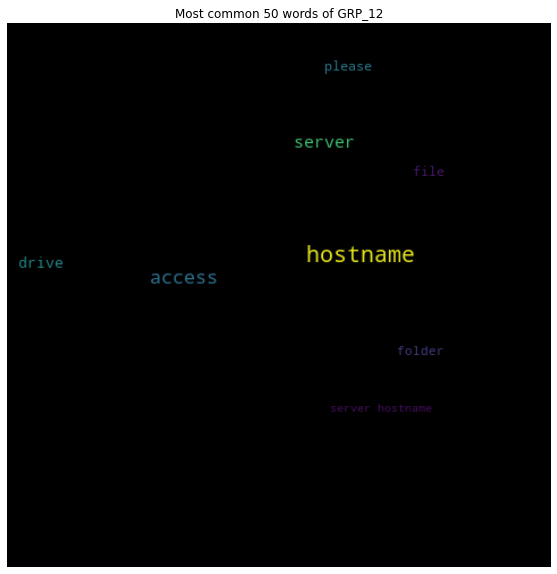

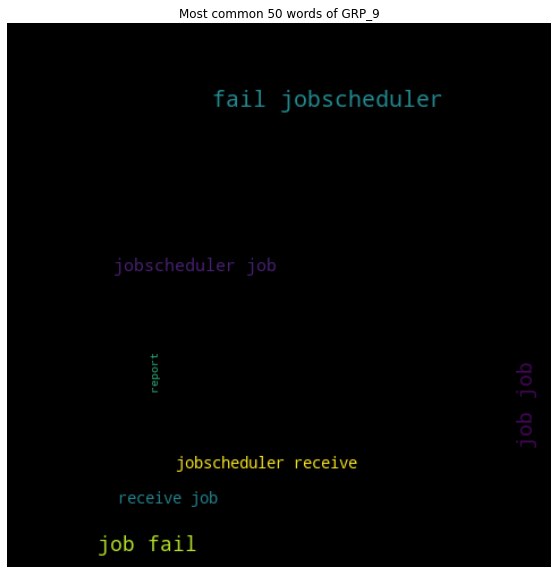

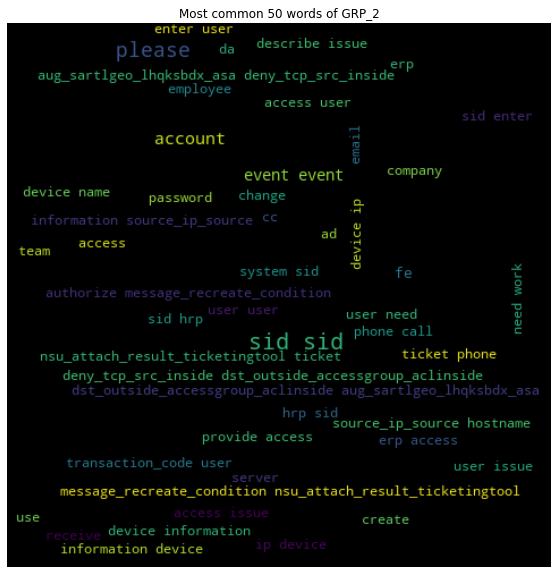

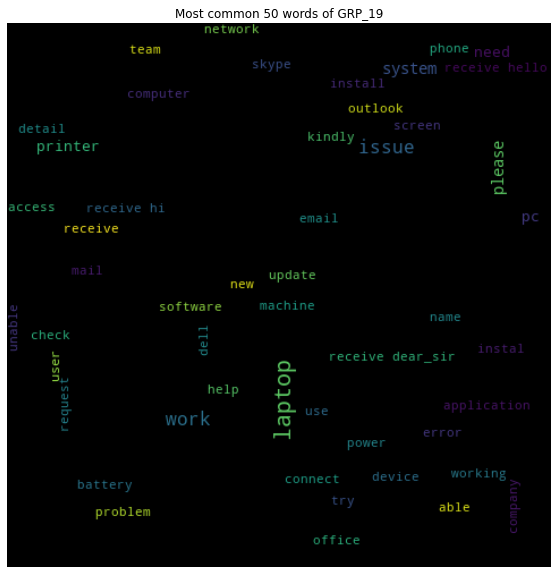

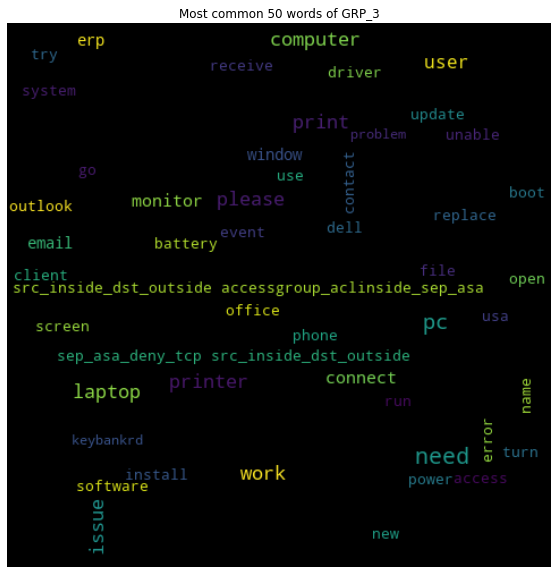

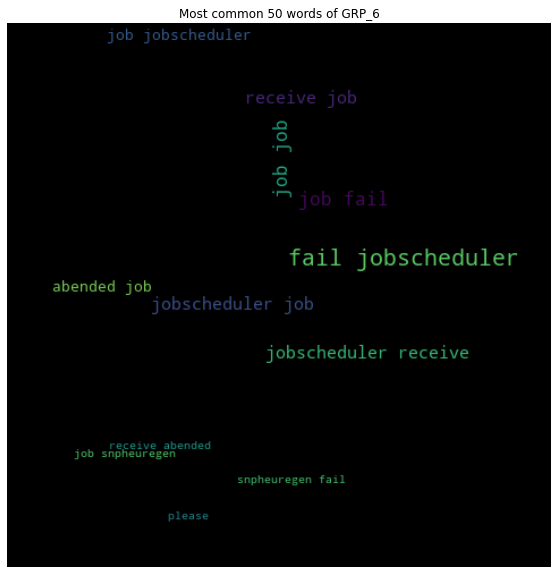

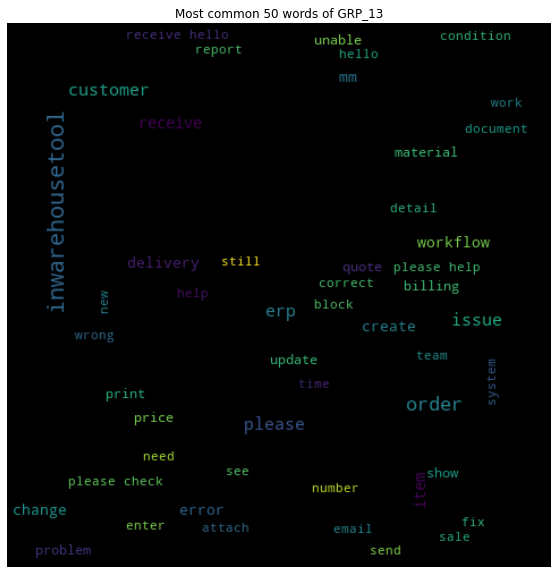

In [82]:
for i in range(10):

    Grp = new_df[new_df ['Assignment group'] == sortedListOfGroup[i]]
    Grp = Grp['words']
    wordcloud_grp(Grp,sortedListOfGroup[i])

In [90]:
df_ML.head()

,Unnamed: 0,Caller,Assignment group,combined_description,Language,ConvertedToEnglish
0,0,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,en,login issue verify user detailsemployee manage...
1,1,hmjdrvpb komuaywn,GRP_0,outlook received from hello team my meetings...,en,outlook receive hello team meetingsskype meeti...
2,2,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from hi i cannot...,en,can not log vpn receive hi can not log vpn best
3,3,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,en,unable access hrtool page unable access hrtool...
4,4,owlgqjme qhcozdfx,GRP_0,skype error skype error,no,Skype Error Skype Error


Applying Deterministic Rules

In [ ]:
df_ML.columns

Index(['Caller', 'Assignment group', 'combined_description', 'Language',
       'ConvertedToEnglish', 'pred_group'],
      dtype='object')

In [ ]:
df_ML.insert(loc=5,column='pred_group',value=np.nan,allow_duplicates=True)

In [ ]:
df_DL.insert(loc=5,column='pred_group',value=np.nan,allow_duplicates=True)

In [ ]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Caller                8417 non-null   object 
 1   Assignment group      8417 non-null   object 
 2   combined_description  8417 non-null   object 
 3   Language              8417 non-null   object 
 4   ConvertedToEnglish    8417 non-null   object 
 5   pred_group            0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 394.7+ KB


In [ ]:
def deterministicRules(df,columnName):
  for i in range(df.shape[0]):
      #1 Contains telephony_software > GRP_7
    if pd.notna(df[columnName][i]):
      if ('telephonysoftware' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_7'
      #2 contains cutview >  GRP_66
      elif ('cutview' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_66'
      #3 contains engg application >  GRP_58
      elif ('engg application' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_58'
      #4 contains ethics >  GRP_23
      elif ('ethics' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_23'
      # contains crm dynamics >  GRP_22
      elif ('crm dynamics' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_22'
      # contains distributor tool & company center >  GRP_21
      elif ('distributor tool' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_21'
      elif ('company center' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_21'
      # contains bpctwhsn kzqsbmtp & network outage or circuit outage >  GRP_8
      elif (df['Caller'][i] == 'bpctwhsn kzqsbmtp' and ('network outage' in df[columnName][i] or 'circuit outage' in df[columnName][i])):
        df['pred_group'][i] = 'GRP_8'
      elif ('reset passwords' in df[columnName][i] and 'the' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_17'
      elif (df[columnName][i].startswith('erp access issue')):
        df['pred_group'][i] = 'GRP_2'
      elif ('vsphere' in df[columnName][i] or 'esxi' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_12'
      elif ('windows account' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('erp sid account lock' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('erp sid password reset' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif(df['Caller'][i] == 'jionmpsf wnkpzcmv' and 'eutool' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_24'
      elif(df['Caller'][i] == 'cwrikael oanmsecr' and 'eutool' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('sso portal' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_73'
      elif ('unable complete forecast' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_67'
      elif (df[columnName][i].startswith('timecard') or df[columnName][i].startswith('time card')):
        df['pred_group'][i] = 'GRP_36'

In [ ]:
deterministicRules(df_ML,'ConvertedToEnglish')

In [ ]:
df_DL.head()

,Caller,Assignment group,combined_description,Language,ConvertedToEnglish,pred_group
0,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,en,login issue verified user detailsemployee mana...,NaN
1,hmjdrvpb komuaywn,GRP_0,outlook received from hello team my meetings...,en,outlook received from hello team my meetingssk...,NaN
2,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from hi i cannot...,en,cant log in to vpn received from hi i cannot l...,NaN
3,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,en,unable to access hrtool page unable to access ...,NaN
4,owlgqjme qhcozdfx,GRP_0,skype error skype error,no,Skype Error Skype Error,NaN


In [ ]:
deterministicRules(df_DL,'ConvertedToEnglish')

In [ ]:
df_ML.head()

,Caller,Assignment group,combined_description,Language,ConvertedToEnglish,pred_group
0,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,en,login issue verify user detailsemployee manage...,NaN
1,hmjdrvpb komuaywn,GRP_0,outlook received from hello team my meetings...,en,outlook receive hello team meetingsskype meeti...,NaN
2,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from hi i cannot...,en,can not log vpn receive hi can not log vpn best,NaN
3,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,en,unable access hrtool page unable access hrtool...,NaN
4,owlgqjme qhcozdfx,GRP_0,skype error skype error,no,Skype Error Skype Error,NaN


In [ ]:
df_determinted = df_ML[~df_ML['pred_group'].isna()]

In [ ]:
df_determinted_DL = df_DL[~df_DL['pred_group'].isna()]

In [ ]:
df_determinted.head()

,Caller,Assignment group,combined_description,Language,ConvertedToEnglish,pred_group
18,nqdyowsm yqerwtna,GRP_0,erp sid account locked erp sid account locked,en,erp sid account lock erp sid account lock,GRP_0
49,aofnvyzt eqiyskhm,GRP_7,status does not change on telephonysoftware wh...,en,status change telephonysoftware closing call a...,GRP_7
80,ilvortuq zfgrlewm,GRP_0,erp sid account locked erp sid account locked,en,erp sid account lock erp sid account lock,GRP_0
154,hckvpary emxbpkwy,GRP_17,reset passwords for hckvpary emxbpkwy using pa...,en,reset passwords hckvpary emxbpkwy use password...,GRP_17
162,kcipjago mlkptgvb,GRP_0,windows account lockout windows account lockout,en,windows account lockout windows account lockout,GRP_0


In [ ]:
df_determinted_DL.head()

,Caller,Assignment group,combined_description,Language,ConvertedToEnglish,pred_group
18,nqdyowsm yqerwtna,GRP_0,erp sid account locked erp sid account locked,en,erp sid account locked erp sid account locked,GRP_0
49,aofnvyzt eqiyskhm,GRP_7,status does not change on telephonysoftware wh...,en,status does not change on telephonysoftware wh...,GRP_7
80,ilvortuq zfgrlewm,GRP_0,erp sid account locked erp sid account locked,en,erp sid account locked erp sid account locked,GRP_0
154,hckvpary emxbpkwy,GRP_17,reset passwords for hckvpary emxbpkwy using pa...,en,reset passwords for hckvpary emxbpkwy using pa...,GRP_17
162,kcipjago mlkptgvb,GRP_0,windows account lockout windows account lockout,en,windows account lockout windows account lockout,GRP_0


In [ ]:
df_determinted['pred_group'].value_counts()

GRP_0     125
GRP_7      83
GRP_2      27
GRP_21     21
GRP_22     15
GRP_66      7
GRP_23      6
GRP_36      4
GRP_12      4
GRP_24      3
GRP_17      2
GRP_58      2
GRP_73      1
GRP_67      1
Name: pred_group, dtype: int64

In [ ]:
#df_ML.to_csv("df_ML")
df_DL.to_csv("df_DL")

Class Imbalance > 

In [ ]:
# Load the dataset into a Pandas dataframe
dataset2 = pd.read_csv('sample_data/df_ML.csv', )
dataset2.head()

,Unnamed: 0,Caller,Assignment group,combined_description,Language,ConvertedToEnglish,pred_group
0,0,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,en,login issue verify user detailsemployee manage...,NaN
1,1,hmjdrvpb komuaywn,GRP_0,outlook received from hello team my meetings...,en,outlook receive hello team meetingsskype meeti...,NaN
2,2,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from hi i cannot...,en,can not log vpn receive hi can not log vpn best,NaN
3,3,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,en,unable access hrtool page unable access hrtool...,NaN
4,4,owlgqjme qhcozdfx,GRP_0,skype error skype error,no,Skype Error Skype Error,NaN


In [ ]:
# Create a column for target (assignment group) variable
dataset2['group'] = dataset2['Assignment group'].str[4:]
#from sklearn. preprocessing import LabelEncoder
#le = LabelEncoder()
#dataset2['group'] = le. fit_transform(dataset2['group'])
dataset2['group'] = dataset2['group'].astype('int8')
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            8417 non-null   int64 
 1   Caller                8417 non-null   object
 2   Assignment group      8417 non-null   object
 3   combined_description  8417 non-null   object
 4   Language              8417 non-null   object
 5   ConvertedToEnglish    8416 non-null   object
 6   pred_group            301 non-null    object
 7   group                 8417 non-null   int8  
dtypes: int64(1), int8(1), object(6)
memory usage: 468.6+ KB


In [ ]:
dataset2.tail()

,Unnamed: 0,Caller,Assignment group,combined_description,Language,ConvertedToEnglish,pred_group,group
8412,8412,avglmrts vhqmtiua,GRP_29,emails not coming in from zz mail received fro...,en,email come zz mail receive good afternoon rece...,NaN,29
8413,8413,rbozivdq gmlhrtvp,GRP_0,telephonysoftware issue telephonysoftware issue,en,telephonysoftware issue telephonysoftware issue,GRP_7,0
8414,8414,oybwdsgx oxyhwrfz,GRP_0,vip windows password reset for tifpdchb pedxru...,en,vip windows password reset tifpdchb pedxruyf v...,NaN,0
8415,8415,ufawcgob aowhxjky,GRP_62,machine nÃ£o estÃ¡ funcionando i am unable to ...,en,machine nÃ£o estÃ ¡ funcionando unable access ...,NaN,62
8416,8416,kqvbrspl jyzoklfx,GRP_49,an mehreren pcs lassen sich verschiedene prgra...,de,several pc open various prgramdntyms several p...,NaN,49


In [ ]:
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(dataset2.combined_description, 
                                                    dataset2.group, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, y_train.shape)
print('\033[1mShape of the test set:\033[0m', X_test.shape, y_test.shape)

Shape of the training set: (6733,) (6733,)
Shape of the test set: (1684,) (1684,)


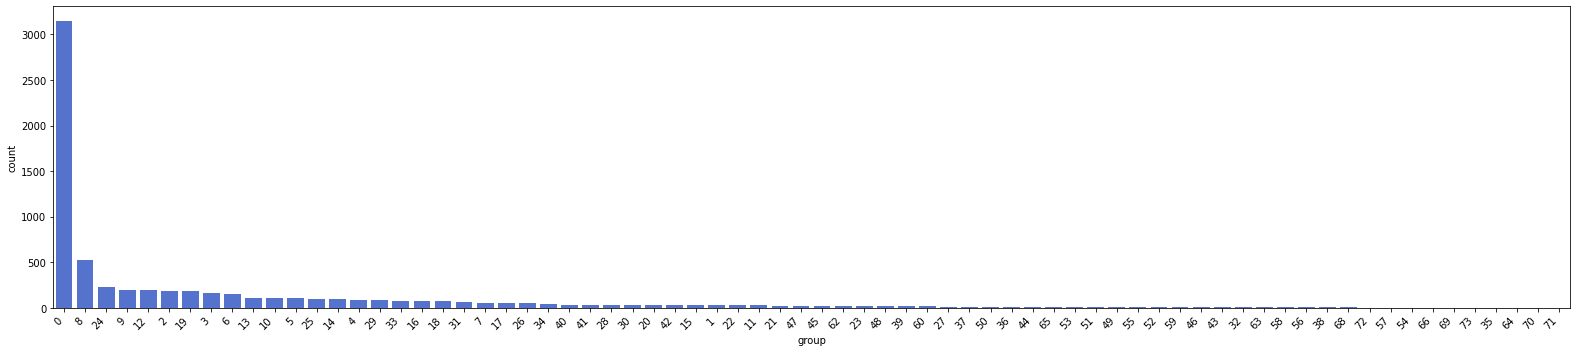

In [ ]:
#Create Dataset 
y_train_df_old = pd. DataFrame(y_train,columns=['group'])
#y_train_df_old_nogrp0 = dataset1[dataset1['Assignment group'] != 'GRP_0']

descending_order = y_train_df_old['group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='group', data=y_train_df_old, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

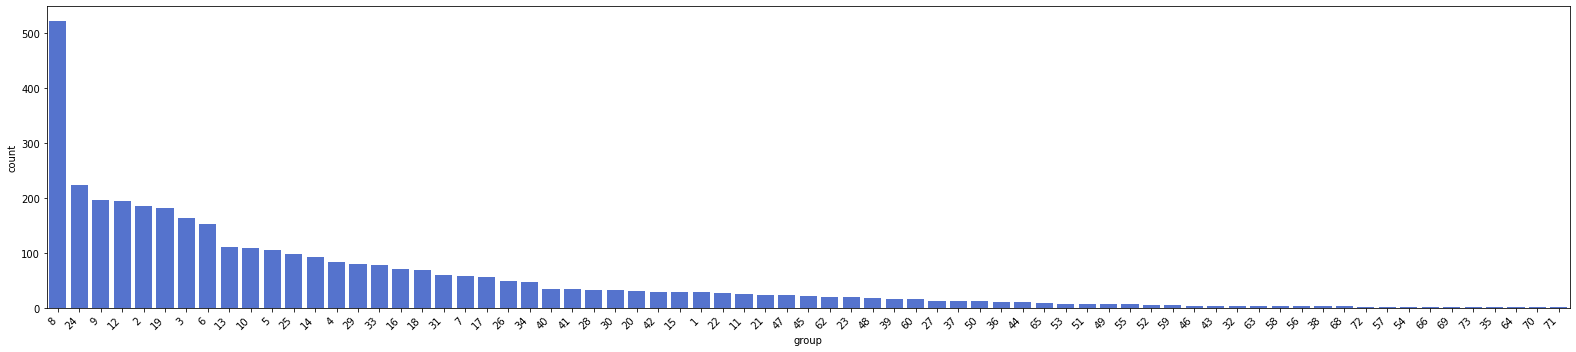

In [ ]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
#y_train_df_old = pd. DataFrame(y_train,columns=['group'])
y_train_df_old_nogrp0 = y_train_df_old[y_train_df_old['group'] != 0]

descending_order = y_train_df_old_nogrp0['group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='group', data=y_train_df_old_nogrp0, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
aug = naw.SynonymAug(aug_src='wordnet',aug_max=3)

In [ ]:
# Take an example for augmentation
example=aug.augment(X_train[5],n=2)
print('\033[1mOriginal text:\033[0m')
print(X_train[5])
print('_'*100)
print('\033[1mAugmented text:\033[0m')
print(example[0])
print(example[1])

Original text:
unable to log in to engineering tool and skype unable to log in to engineering tool and skype
____________________________________________________________________________________________________
Augmented text:
unable to log in to engineering tool and skype ineffectual to lumber in to engineering shaft and skype
unable to log in to engineering tool and skype unable to log in to applied science tool and skype


In [ ]:
augmented_sentences=[]
augmented_sentences_labels=[]
for i in X_train.index:
  if y_train[i] in (24,9,12,2,19,3,6):
    temps=aug.augment(X_train[i],n=3)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])
  elif y_train[i] in (13,10,5,25,14,4,29,33,16,18,31,7,17,26,34):    
    temps=aug.augment(X_train[i],n=6)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])
  elif y_train[i] in (72,57,54,66,69,73,35,64,70,71):    
    temps=aug.augment(X_train[i],n=50)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])
  elif y_train[i] not in (0,8,24,9,12,2,19,3,6,13,10,5,25,14,4,29,33,16,18,31,7,17,26,34,72,57,54,66,69,73,35,64,70,71):    
    temps=aug.augment(X_train[i],n=12)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])

In [ ]:
X_train=X_train.append(pd.Series(augmented_sentences),ignore_index=True)
y_train=y_train.append(pd.Series(augmented_sentences_labels),ignore_index=True)

print(X_train.shape)
print(y_train.shape)

(25372,)
(25372,)


In [ ]:
y_train_df = pd. DataFrame(y_train,columns=['group'])

In [ ]:
y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25372 entries, 0 to 25371
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   group   25372 non-null  int8 
dtypes: int8(1)
memory usage: 24.9 KB


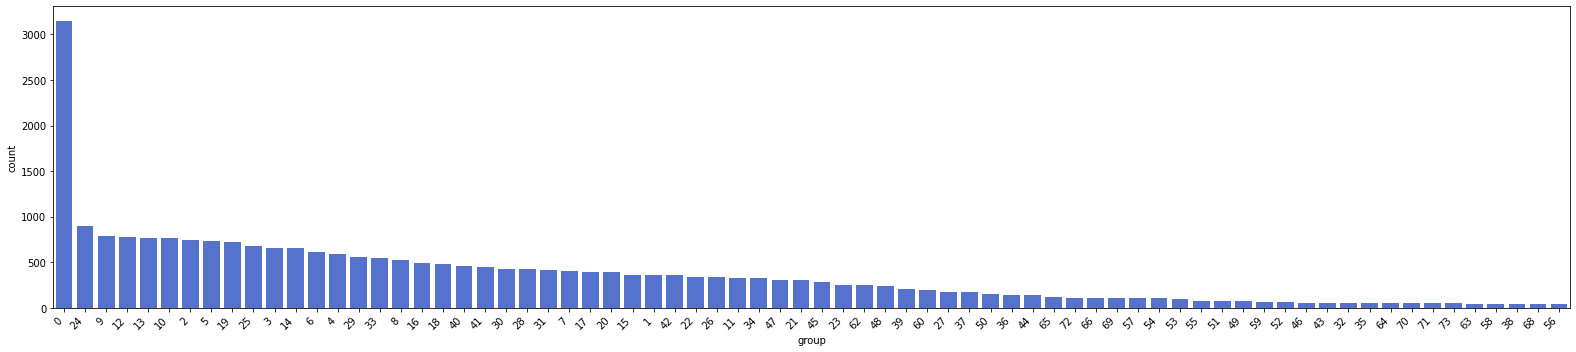

In [ ]:
#Create Dataset 
#y_train_df_old_nogrp0 = dataset1[dataset1['Assignment group'] != 'GRP_0']

descending_order = y_train_df['group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='group', data=y_train_df, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

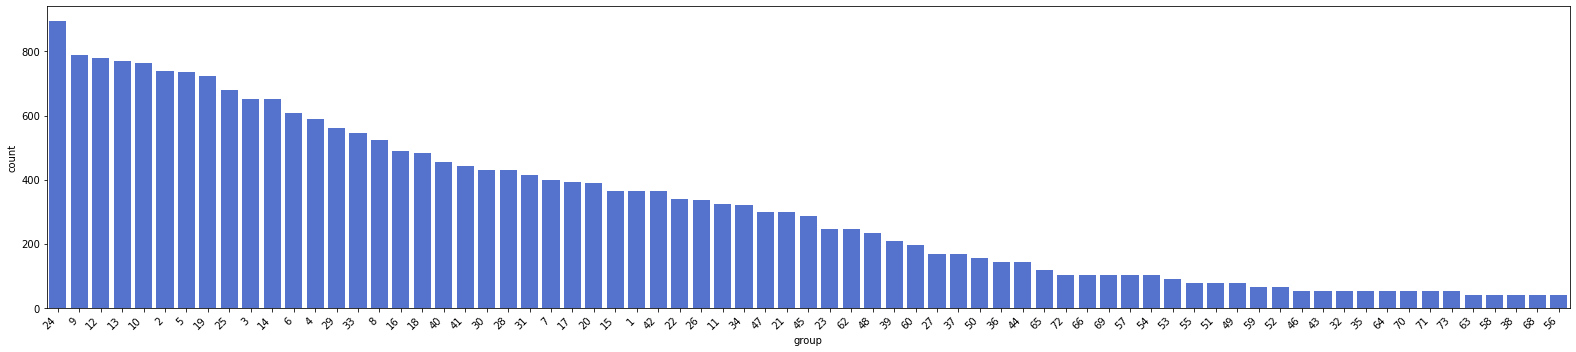

In [ ]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
#y_train_df_old = pd. DataFrame(y_train,columns=['group'])
y_train_df_nogrp0 = y_train_df[y_train_df['group'] != 0]

descending_order = y_train_df_nogrp0['group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='group', data=y_train_df_nogrp0, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
y_train_df.groupby(['group']).size()

group
0     3151
1      364
2      740
3      652
4      588
5      735
6      608
7      399
8      523
9      788
10     763
11     325
12     780
13     770
14     651
15     364
16     490
17     392
18     483
19     724
20     390
21     299
22     338
23     247
24     896
25     679
26     336
27     169
28     429
29     560
30     429
31     413
32      52
33     546
34     322
35      51
36     143
37     169
38      39
39     208
40     455
41     442
42     364
43      52
44     143
45     286
46      52
47     299
48     234
49      78
50     156
51      78
52      65
53      91
54     102
55      78
56      39
57     102
58      39
59      65
60     195
62     247
63      39
64      51
65     117
66     102
68      39
69     102
70      51
71      51
72     102
73      51
dtype: int64